# Simple Neural Style Transfer

Hello! This is my attempt at implementing a very simple neural style transfer algorithm. This notebook was created on a whim and done on a very short time so there's not much about it.

In [ ]:
import tensorflow as tf

import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mp

import numpy as np
import PIL.Image
import time
import functools

mp.rcParams['figure.figsize'] = (15,15)
mp.rcParams['axes.grid'] = False

In [ ]:
def tensor_to_image(tensor):
  tensor = np.array(tensor*255, dtype=np.uint8)
  return PIL.Image.fromarray(tensor[0])

In [ ]:
# load image from the internet
content_src = 'https://rimage.gnst.jp/livejapan.com/public/article/detail/a/00/01/a0001379/img/basic/a0001379_main.jpg' 
content_path =  tf.keras.utils.get_file('tokyo.jpg',content_src)

style_src = 'https://images-na.ssl-images-amazon.com/images/I/81EZn5FzBIL._AC_SL1500_.jpg'
style_path =  tf.keras.utils.get_file('kanagawa.jpg',style_src)

In [ ]:
def load_img(path_to_img):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  new_shape = tf.cast(shape, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [ ]:
def imshow(image, title=None):
  image = tf.squeeze(image, axis=0)
  plt.imshow(image)
  if title:
    plt.title(title)

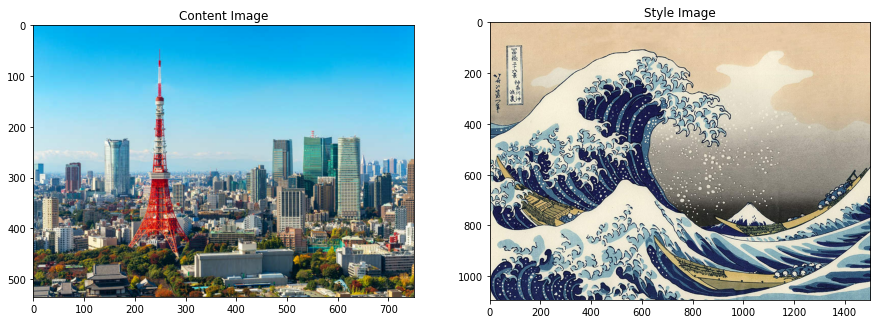

In [ ]:
# preview image
content_image = load_img(content_path)
plt.subplot(221)
imshow(content_image, 'Content Image')

style_image = load_img(style_path)
plt.subplot(222)
imshow(style_image, 'Style Image')

In [ ]:
import tensorflow_hub as hub

def style_transfer():
  hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
  stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
  return stylized_image

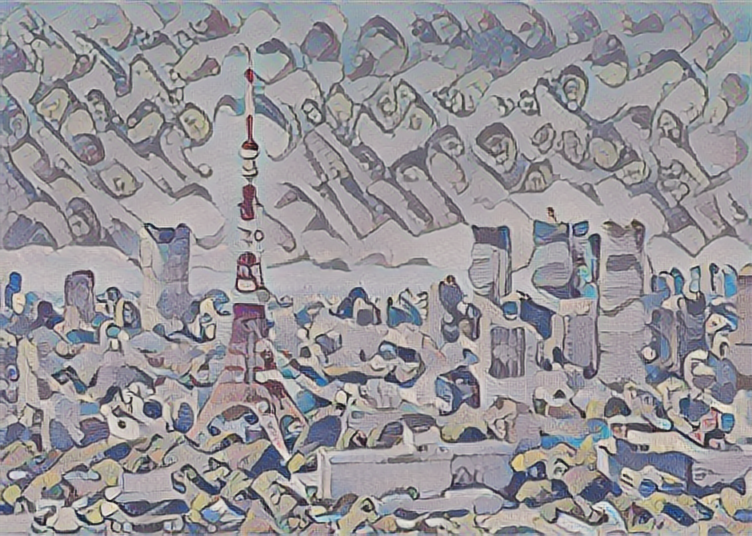

In [ ]:
result = tensor_to_image(style_transfer())
result.save('result.jpg')
result